In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [3]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [4]:
#Caricamento del grafo orientato

df_edge = pd.read_csv('twitch\DE\musae_DE_edges.csv')
edges = list(zip(df_edge["from"],df_edge["to"]))

In [5]:
edges = list(zip(df_edge["from"],df_edge["to"]))
df_target = pd.read_csv('twitch\DE\musae_DE_target.csv')
df_target_partner = df_target[df_target["partner"] ==True]
id_list = df_target_partner["new_id"].to_list()
edges_partner = []
for f, t in zip(df_edge["from"].to_list(),df_edge["to"].to_list()):
    if (f in id_list and t in id_list):
        edges_partner.append((f,t))
print(len(edges_partner))
nodes_partner= df_target_partner['new_id']
print(len(nodes_partner))
edges = edges_partner
nodes = nodes_partner

10593
597


In [6]:
graph_sample = nx.DiGraph()
graph_sample.add_edges_from(edges)
graph_sample.add_nodes_from(nodes)
pos_sample = nx.spring_layout(graph_sample)

### Analisi descrittiva

In [6]:
print("NODES: ", len(graph_sample.nodes))
print("EDGES: ", len(graph_sample.edges))
print("DENSITY: ", round(nx.density(graph_sample),3))
print("CLUSTERING AVERAGE: ", nx.average_clustering(graph_sample))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  597
EDGES:  10593
DENSITY:  0.03
CLUSTERING AVERAGE:  0.16472073181878133


In [7]:
nx.clustering(graph_sample)

{11: 0.08187134502923976,
 5379: 0.19047619047619047,
 2867: 0.08169934640522876,
 2268: 0.16304347826086957,
 2347: 0.16798418972332016,
 1402: 0.16267123287671234,
 4500: 0.06745098039215686,
 6535: 0.10383064516129033,
 3534: 0.1268472906403941,
 8801: 0.16176470588235295,
 7091: 0.18095238095238095,
 2234: 0.18,
 5264: 0.1527777777777778,
 3163: 0.12098597919493442,
 8630: 0.13124274099883856,
 5834: 0.10304878048780487,
 8753: 0.0898995240613432,
 2930: 0.15384615384615385,
 5208: 0.14736842105263157,
 7127: 0.15623843021103295,
 27: 0.1793478260869565,
 8700: 0.12796143250688705,
 4538: 0.1300125313283208,
 2064: 0.12512077294685992,
 4751: 0.1319207108680793,
 1490: 0.1457071883247943,
 617: 0.1451770451770452,
 5358: 0.1493993993993994,
 189: 0.175,
 3234: 0.09899749373433583,
 8723: 0.12627197039777982,
 8935: 0.14668367346938777,
 3173: 0.12112068965517242,
 7208: 0.15233785822021115,
 7398: 0.17532467532467533,
 4918: 0.19344262295081968,
 6418: 0.17192192192192193,
 1642: 0

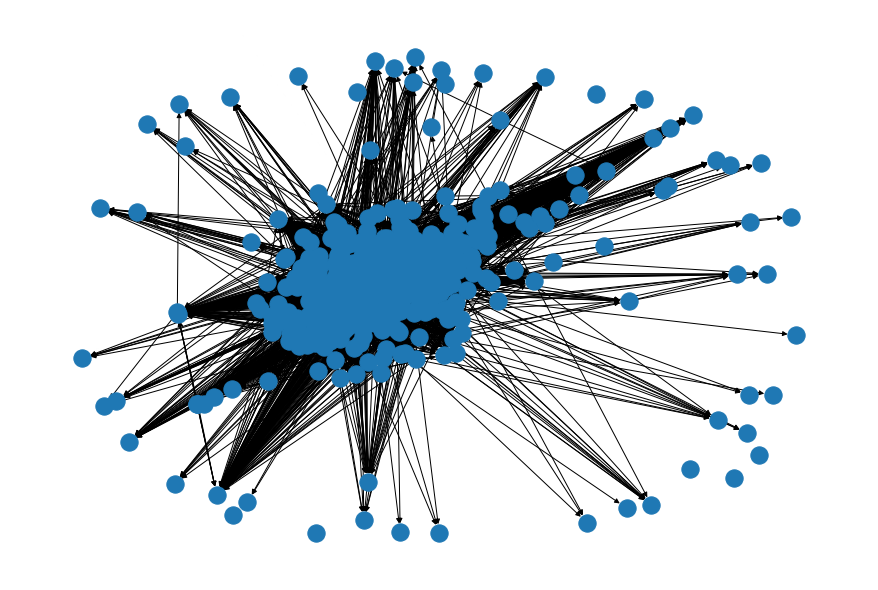

In [8]:
plt.figure(figsize=(12,8))
nx.draw(graph_sample, pos_sample)
plt.show()

### Analisi della centralità

Degree Centrality

<AxesSubplot:>

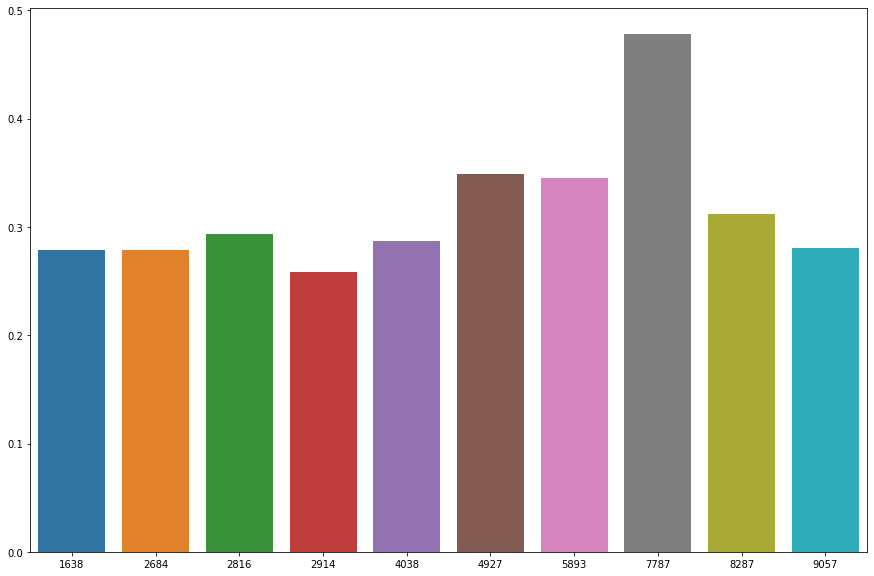

In [9]:
deg = nx.degree_centrality(graph_sample)
x=[]
y=[]
deg_sorted = {}

deg = sorted(deg.items(), key=lambda x:x[1], reverse=True)
for nodi in deg:
    deg_sorted.update({nodi[0]: nodi[1]})
deg = deg_sorted
for key, value in deg_sorted.items():
    if len(x) < 10:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

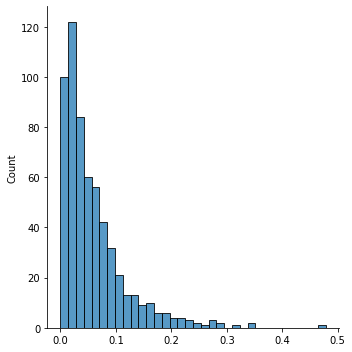

In [10]:
sns.displot(list(deg.values()))

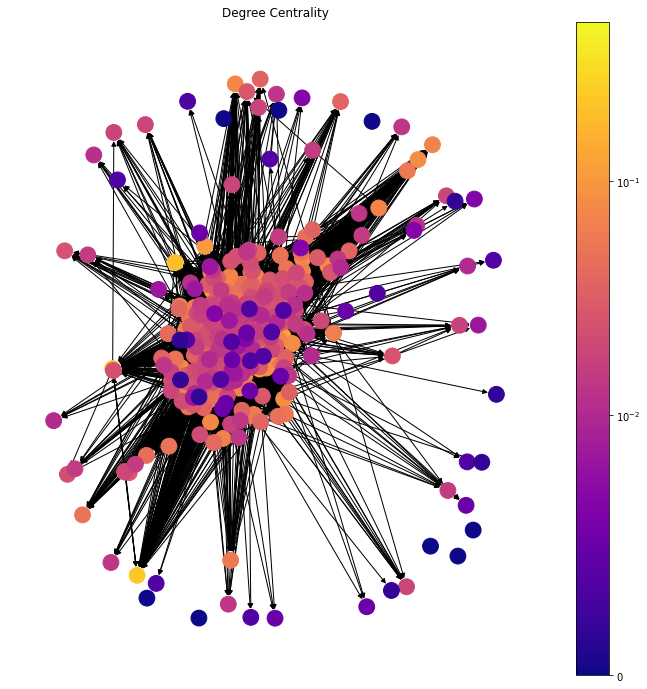

In [11]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, deg, 'Degree Centrality')

In [12]:
#cambiare visualizzazione
plt.figure(figsize=(12,8))
labels = {} # quale nodo deve avere quale label
for key, value in deg.items():
    if value > 0.3: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph_sample)
nx.draw(graph_sample, pos_sample, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_sample, pos_sample, labels)
plt.show()

KeyboardInterrupt: 

Betweenness Centrality

Text(0.5, 0.98, 'Ciao')

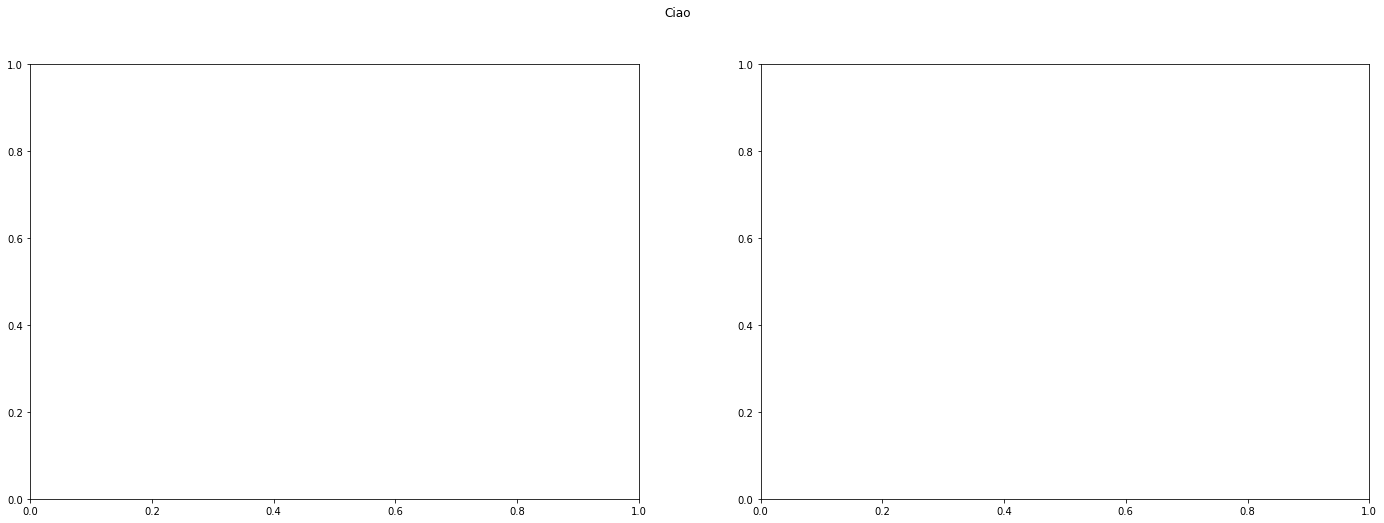

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
fig.suptitle('Ciao')


In [8]:
bet = nx.betweenness_centrality(graph_sample)
x=[]
y=[]
bet_sorted = {}

bet = sorted(bet.items(), key=lambda x:x[1], reverse=True)
for nodi in bet:
    bet_sorted.update({nodi[0]: nodi[1]})
bet = bet_sorted
for key, value in bet_sorted.items():
    if len(x) < 10:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, ax=ax1)

<AxesSubplot:>

<Figure size 1080x720 with 0 Axes>

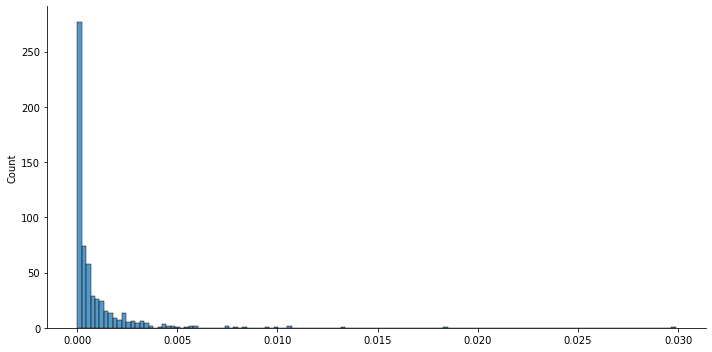

In [ ]:
sns.displot(list(bet.values()), aspect=2)

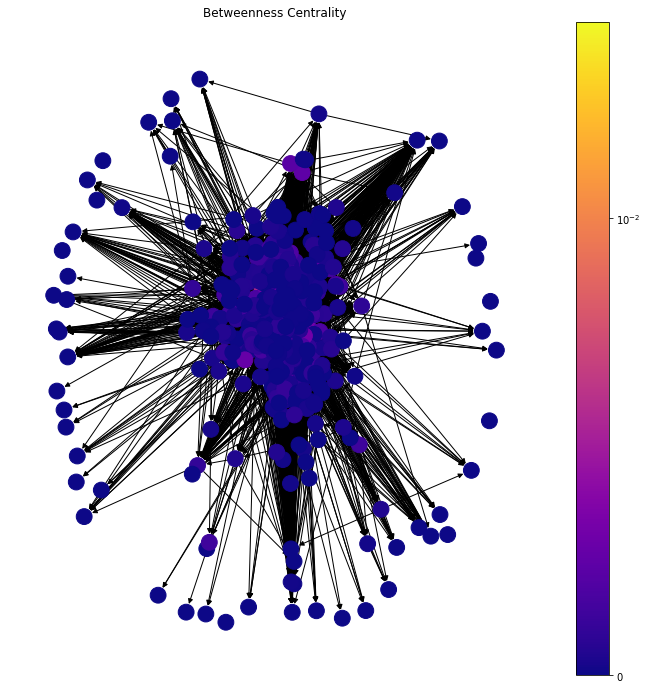

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, bet, 'Betweenness Centrality')

In [9]:
col = []
x_values = ax1.get_xticklabels()
x_values = [x.get_text() for x in x_values]
for i in range(0, len(ax1.patches)):
    colori = []
    colori = list(ax1.patches[i].get_facecolor())
    colori.append(int(x_values[i]))
    col.append(colori)
    
dizionatio_colori = {}
for colori in col:
    color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
    dizionatio_colori.update({colori[4]: color_HEX})
print(dizionatio_colori)

{116: '#3173a1', 2498: '#e0802c', 2684: '#3a913a', 2816: '#c03c3d', 2914: '#9371b2', 4038: '#835b53', 4927: '#d584bc', 5893: '#7f7f7f', 6652: '#a8a935', 7787: '#2dabb8'}


In [ ]:
#cambiare visualizzazione
plt.figure(figsize=(12,8))
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key


pos_sample = nx.spring_layout(graph_sample)
nx.draw(graph_sample, pos_sample, ax=ax2, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_nodes(graph_sample, pos_sample, nodelist=list(dizionatio_colori.keys()), node_color=list(dizionatio_colori.values()))
#nx.draw_networkx_edges(graph_sample, pos_sample)
nx.draw_networkx_labels(graph_sample, pos_sample, labels)
plt.show()

{116: '#3173a1', 2498: '#e0802c', 2684: '#3a913a', 2816: '#c03c3d', 2914: '#9371b2', 4038: '#835b53', 4927: '#d584bc', 5893: '#7f7f7f', 6652: '#a8a935', 7787: '#2dabb8'}


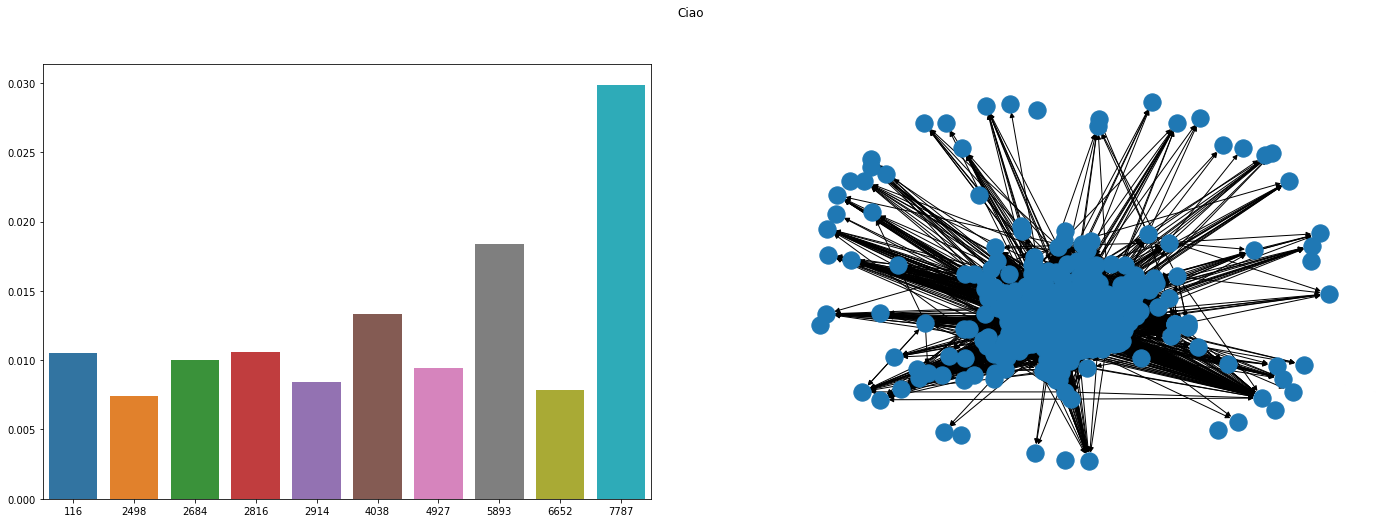

<Figure size 1080x720 with 0 Axes>

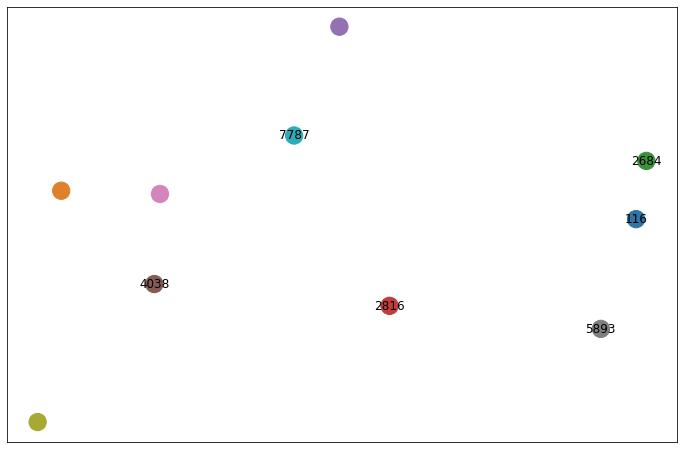

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
fig.suptitle('Ciao')



bet = nx.betweenness_centrality(graph_sample)
x=[]
y=[]
bet_sorted = {}

bet = sorted(bet.items(), key=lambda x:x[1], reverse=True)
for nodi in bet:
    bet_sorted.update({nodi[0]: nodi[1]})
bet = bet_sorted
for key, value in bet_sorted.items():
    if len(x) < 10:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, ax=ax1)



col = []
x_values = ax1.get_xticklabels()
x_values = [x.get_text() for x in x_values]
for i in range(0, len(ax1.patches)):
    colori = []
    colori = list(ax1.patches[i].get_facecolor())
    colori.append(int(x_values[i]))
    col.append(colori)
    
dizionatio_colori = {}
for colori in col:
    color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
    dizionatio_colori.update({colori[4]: color_HEX})
print(dizionatio_colori)



#cambiare visualizzazione
plt.figure(figsize=(12,8))
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key


pos_sample = nx.spring_layout(graph_sample)
nx.draw(graph_sample, pos_sample, ax=ax2, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_nodes(graph_sample, pos_sample, ax=ax2, nodelist=list(dizionatio_colori.keys()), node_color=list(dizionatio_colori.values()))
#nx.draw_networkx_edges(graph_sample, pos_sample)
#nx.draw_networkx_labels(graph_sample, pos_sample, labels)
plt.show()

Closeness Centrality

<AxesSubplot:>

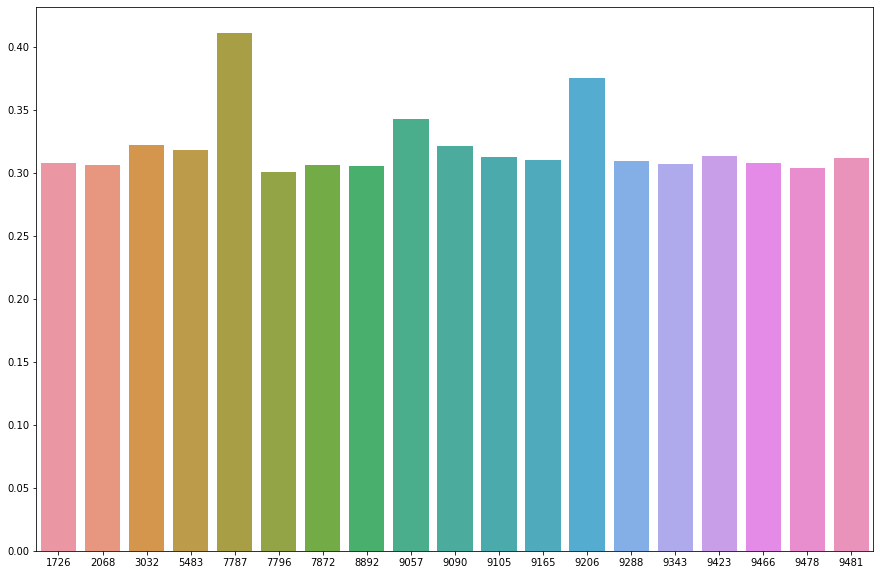

In [ ]:
clos = nx.closeness_centrality(graph_sample)
x=[]
y=[]
for key, value in clos.items():
    if value > 0.3:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

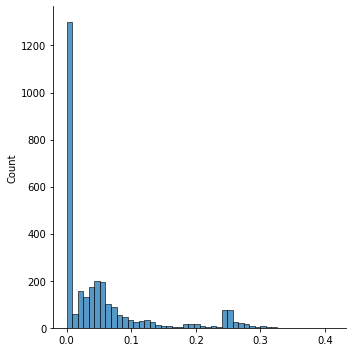

In [ ]:
sns.displot(list(clos.values()))

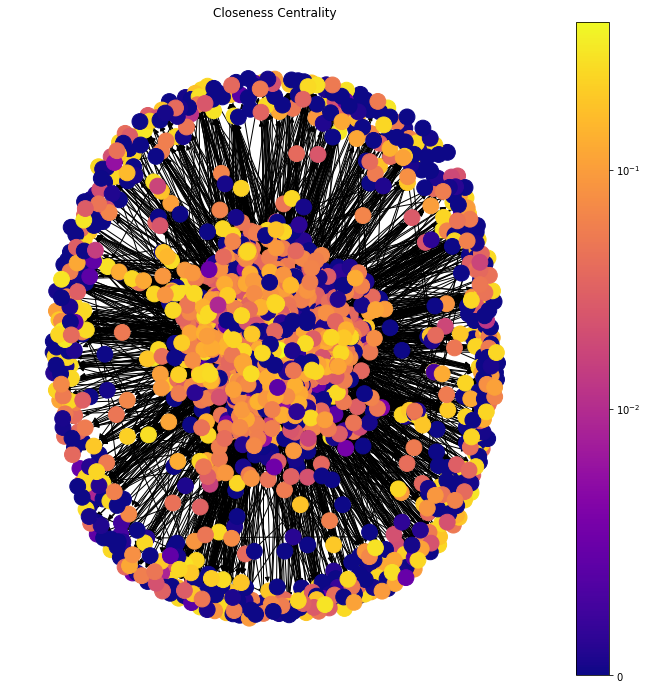

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, clos, 'Closeness Centrality')

In [ ]:
#cambiare visualizzazione
plt.figure(figsize=(12,8))
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph_sample)
nx.draw(graph_sample, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_sample, pos, labels)

Eigenvector Centrality

<AxesSubplot:>

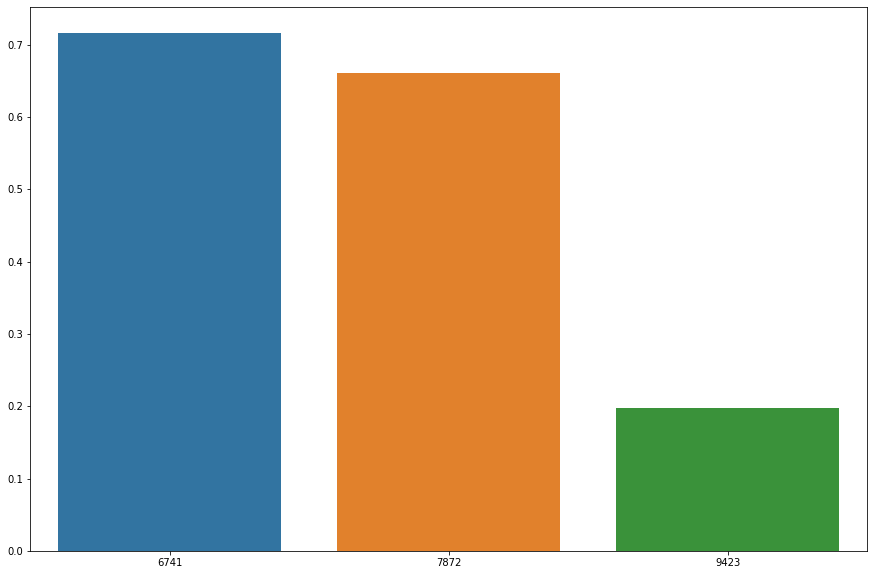

In [ ]:
eigv = nx.eigenvector_centrality(graph_sample, max_iter=400)
x=[]
y=[]
for key, value in eigv.items():
    if value > 0.1:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

C:\Users\mat98\AppData\Local\Temp\ipykernel_3288\2072448624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=False)


<AxesSubplot:>

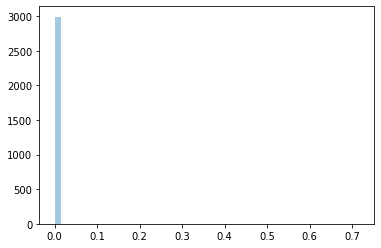

In [ ]:
sns.distplot(list(eigv.values()), kde=False)

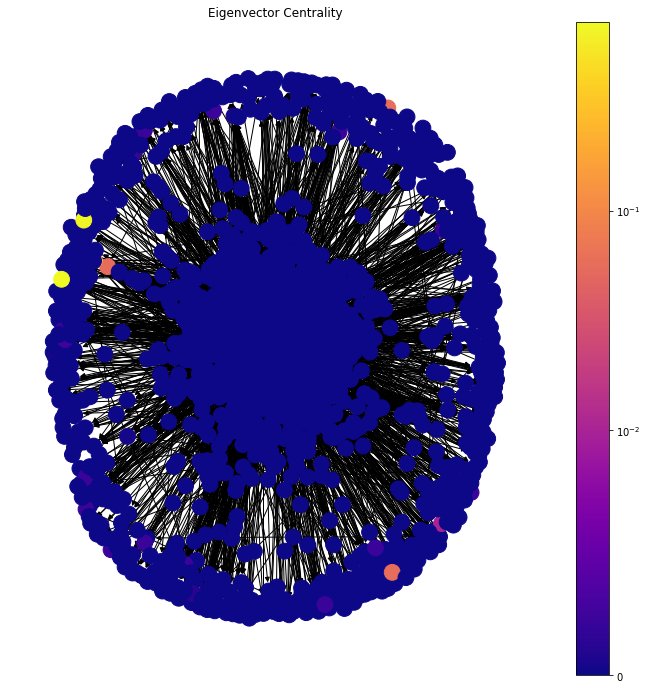

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, eigv, 'Eigenvector Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

PageRank

<AxesSubplot:>

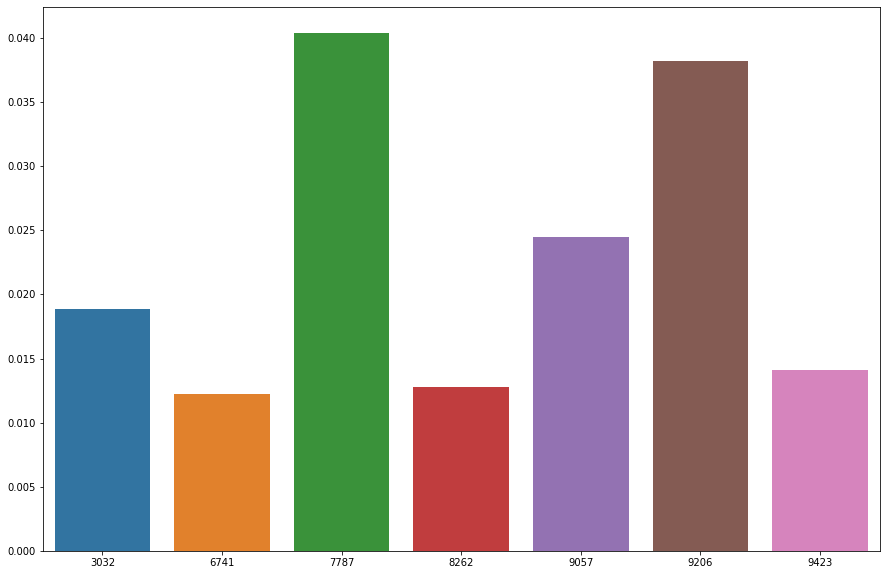

In [ ]:
pager = nx.pagerank(graph_sample, alpha=0.85) #l'alpha è chiamato damping factor
x=[]
y=[]
for key, value in pager.items():
    if value > 0.01:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

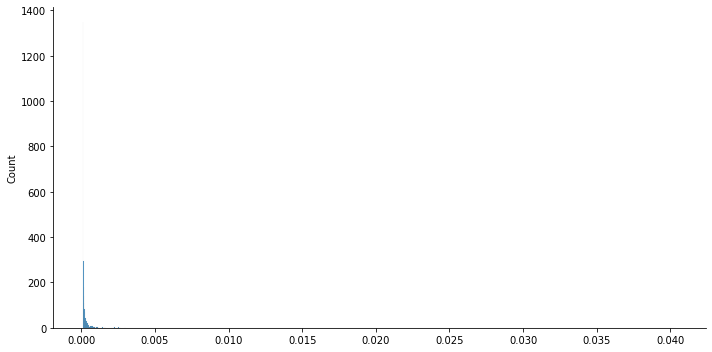

In [ ]:
sns.displot(list(pager.values()), kde=False, aspect=2)

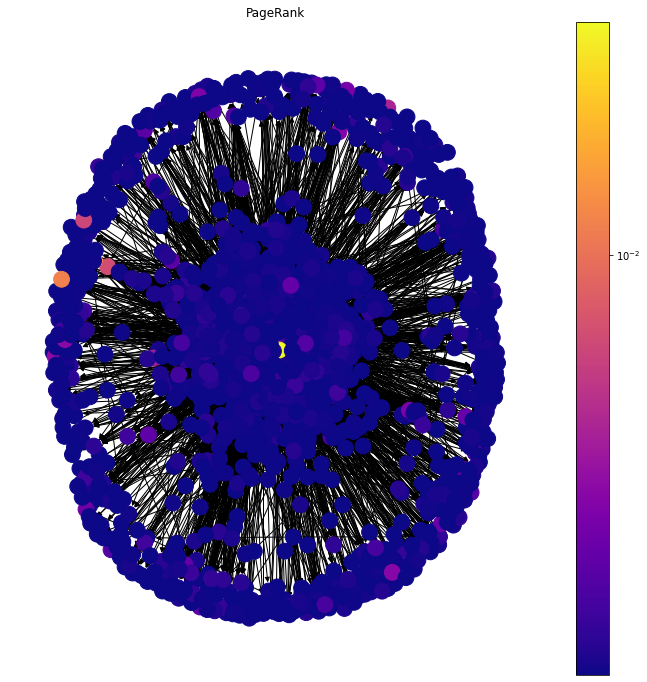

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, pager, 'PageRank')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

### Analisi delle strutture

Communites

In [ ]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph_sample)
communities

[frozenset({17,
            36,
            41,
            54,
            59,
            66,
            68,
            72,
            79,
            104,
            112,
            126,
            138,
            142,
            178,
            206,
            221,
            234,
            236,
            244,
            273,
            296,
            301,
            315,
            337,
            344,
            381,
            382,
            383,
            385,
            390,
            400,
            419,
            422,
            430,
            449,
            456,
            478,
            515,
            521,
            526,
            535,
            539,
            540,
            566,
            573,
            575,
            598,
            622,
            629,
            640,
            648,
            657,
            693,
            697,
            701,
            736,
            754,
            756,
      

In [ ]:
len(communities)

232